In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
import glob
files=glob.glob('/content/drive/My Drive/MACHINE LEARNING/Colab Notebooks/*.csv')
for file in files:
  print(file)

In [5]:
file_path='/content/drive/My Drive/MACHINE LEARNING/BankNote_Authentication.csv'
df=pd.read_csv(file_path)

In [6]:
X = df.drop('class', axis=1).values
y = df['class'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42
      )

In [8]:
mlp = MLPClassifier(
      hidden_layer_sizes=(10, 10),
      activation='relu',
      solver='adam',
      learning_rate_init=0.001,
      max_iter=500,
      early_stopping=True,
      validation_fraction=0.1,
      random_state=42
      )


In [9]:
mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10), max_iter=500,
              random_state=42)

In [10]:
y_pred = mlp.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[147   1]
 [ 26 101]]


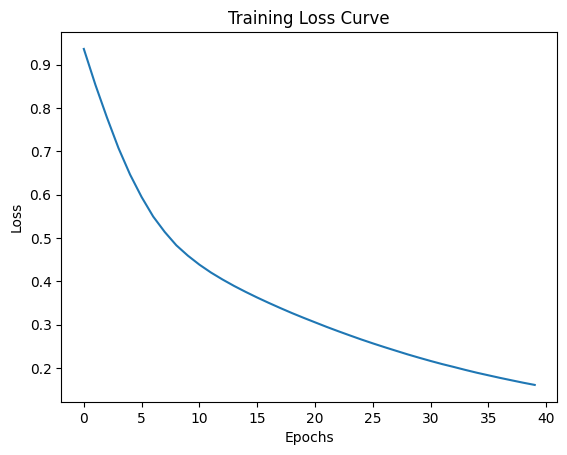

In [12]:
plt.plot(mlp.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


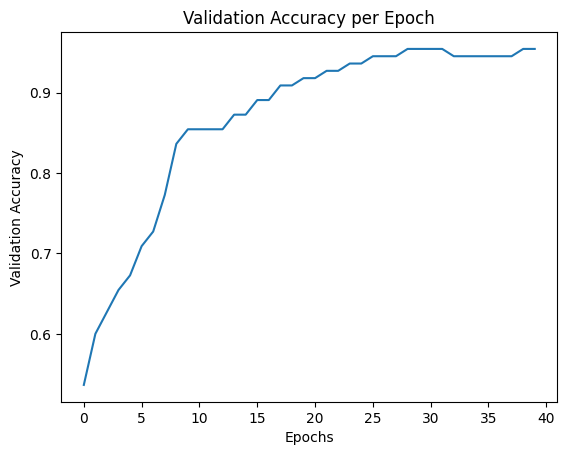

In [13]:
if hasattr(mlp, 'validation_scores_'):
  plt.plot(mlp.validation_scores_)
  plt.title("Validation Accuracy per Epoch")
  plt.xlabel("Epochs")
  plt.ylabel("Validation Accuracy")
  plt.show()
